<a href="https://colab.research.google.com/github/kmahatma/ssmi-patternrecognition/blob/main/w06_02_cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.	CART (Classification And Regression Tree)


In [3]:
# Google Drive Setup
from google.colab import drive
drive.mount('/content/drive')

# Set the default working directory

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california_dataset = fetch_california_housing(as_frame=True)

# Get it as a DataFrame
california = california_dataset.frame

# Optionally, rename target to something like 'MEDV' to keep old code consistent
california.rename(columns={'MedHouseVal': 'MEDV'}, inplace=True)

# Feature names
names = california_dataset.feature_names

# Preview
print(california.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [5]:
#Library CART pada python
from sklearn.tree import DecisionTreeRegressor

array = california.values

X = array[:,0:8]
Y = array[:,8]
#print(X)
#print(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#model = DecisionTreeRegressor(max_leaf_nodes = 20)


model = DecisionTreeRegressor(
    criterion='squared_error',      # updated from 'mse'
    max_depth=None,
    max_features=None,
    max_leaf_nodes=50,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=None,
    splitter='best'
)


In [6]:
#Evaluasi
rt = model.fit(X_train, Y_train)
rt

import random as rnd

rnd.seed(123458)
X_new = X[rnd.randrange(X.shape[0])]
X_new = X_new.reshape(1,8)

#Prediksi Model
YHat = model.predict(X_new)


df = pd.DataFrame(X_new, columns = names)
df["Predicted Price"] = YHat
df.head(1)

from sklearn.metrics import r2_score
YHat = model.predict(X_test)
print(YHat)

#Menghitung Rata-rata Kuadrat
r2 = r2_score(Y_test, YHat)
print("R-Squared = ", r2)


[4.05792437 2.20749317 4.05792437 ... 2.99332894 1.97802157 1.42736968]
R-Squared =  0.6508453789108937


**Visualisasi CART**

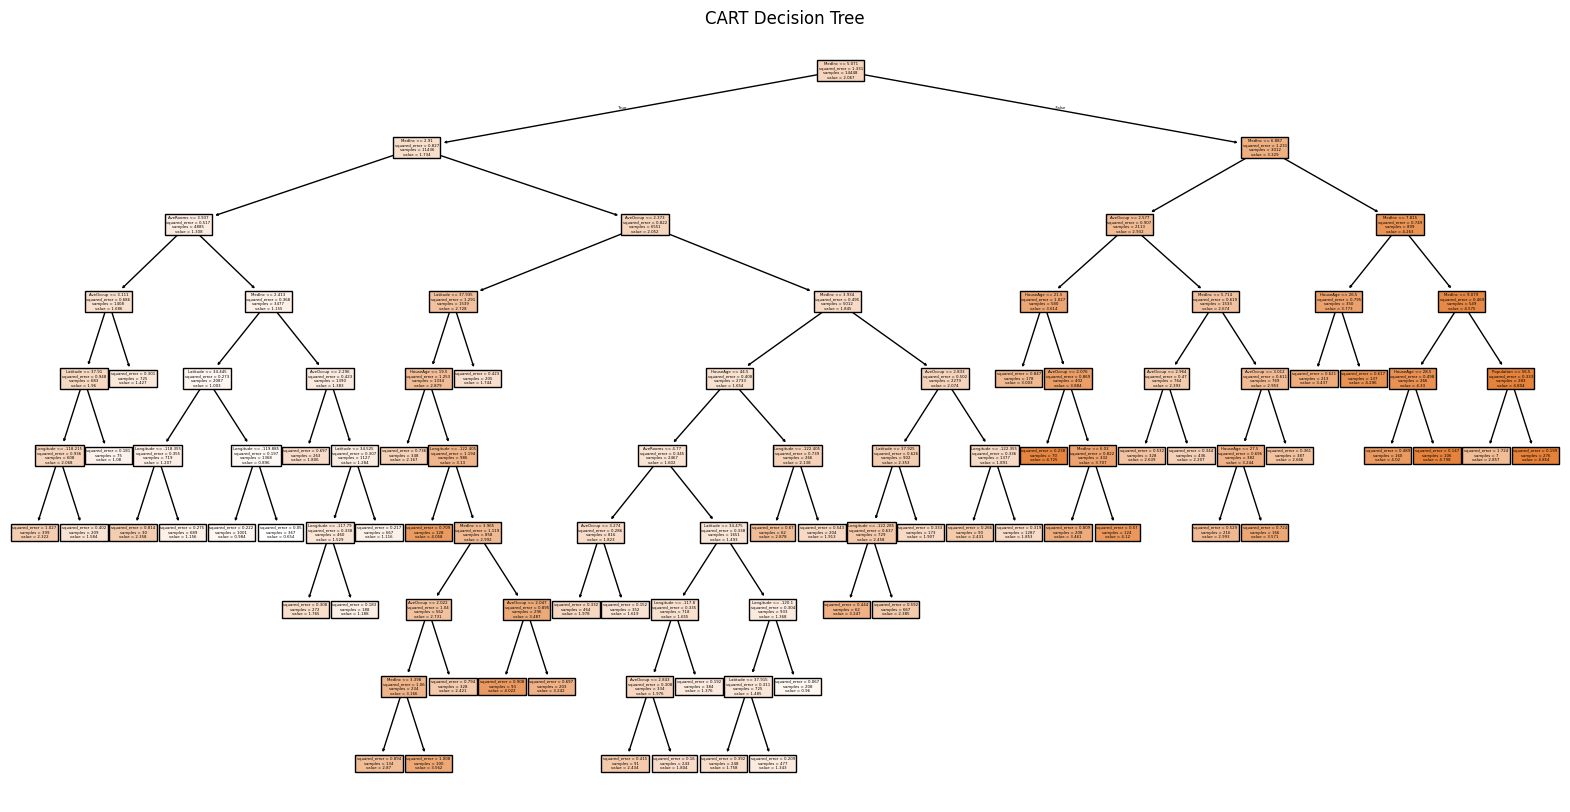

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=california.columns[:-1])
plt.title("CART Decision Tree")
plt.show()



# Visualisasi Hasil

 1. Scatter Plot: Actual vs Predicted

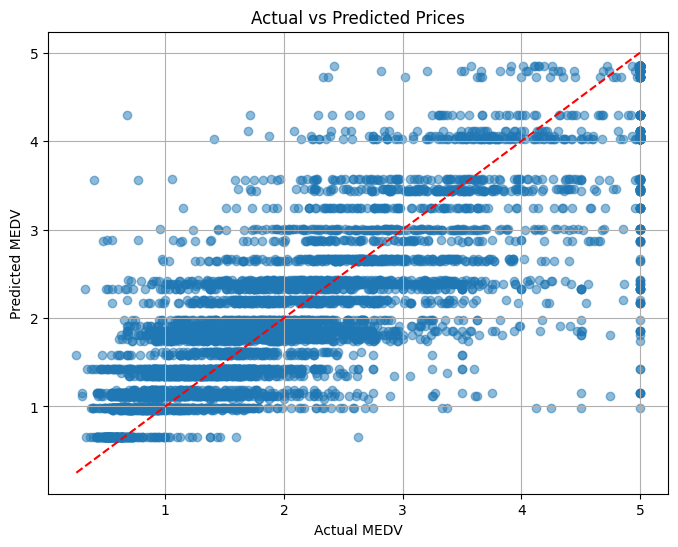

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(Y_test, YHat, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


2. Residual Plot (Prediction Error)

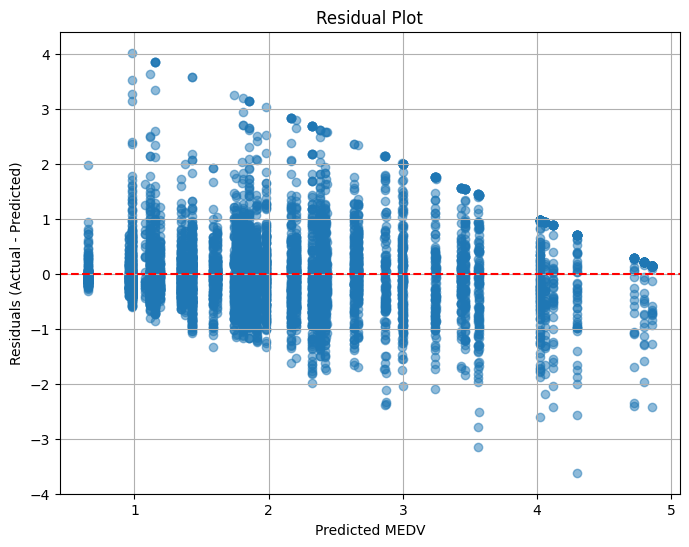

In [10]:
residuals = Y_test - YHat

plt.figure(figsize=(8,6))
plt.scatter(YHat, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


3. Line Plot Comparison (Sample-wise)

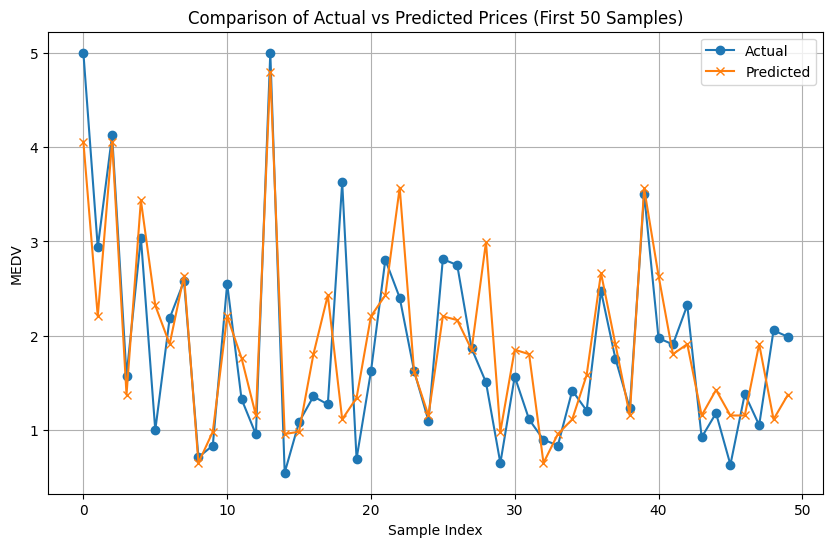

In [12]:
plt.figure(figsize=(10,6))
plt.plot(Y_test[:50], label="Actual", marker='o')
plt.plot(YHat[:50], label="Predicted", marker='x')
plt.title("Comparison of Actual vs Predicted Prices (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("MEDV")
plt.legend()
plt.grid(True)
plt.show()
